<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/Lab_4/Lab_4_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matrix Solution for Multiple Regression**
This notebook demonstrates how to solve a multiple regression problem using matrix operations in Python. We will manually implement the normal equation to find the coefficients for a regression model with two predictors.

## Problem Setup
We have two predictors (X1, X2) and one response variable (Y). The goal is to fit a linear model of the form:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

Using the normal equation:

$$
\mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

## Step 1: Define Data
We will simulate a small dataset with 5 observations for two predictors (X1, X2) and the response variable (Y).




In [ ]:
import numpy as np

# Simulated data for two predictors (X1, X2) and one response (Y)
# We will have 5 observations
X1 = np.array([10, 12, 14, 16, 18])
X2 = np.array([5, 7, 10, 12, 15])
Y = np.array([40, 50, 60, 70, 80])

# Display the data
print("X1:", X1)
print("X2:", X2)
print("Y:", Y)

X1: [10 12 14 16 18]
X2: [ 5  7 10 12 15]
Y: [40 50 60 70 80]


## Step 2: Construct the Design Matrix
We add a column of ones to account for the intercept term.

In [ ]:
# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X = np.column_stack((np.ones(len(X1)), X1, X2))

# Display the design matrix
print("Design Matrix (X):")
print(X)


Design Matrix (X):
[[ 1. 10.  5.]
 [ 1. 12.  7.]
 [ 1. 14. 10.]
 [ 1. 16. 12.]
 [ 1. 18. 15.]]


## Step 3: Solve the Normal Equation
We use the normal equation to solve for the regression coefficients

$$
\mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

In [ ]:
# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y

# X^T X
X_transpose_X = np.dot(X.T, X)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X.T, Y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)


Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]


## Step 4: Predict the Response Values
Using the calculated coefficients, we predict the response values $\hat(Y) $


In [ ]:
# Step 4: Use the coefficients to predict Y
Y_pred = np.dot(X, beta)

print("Predicted Y:", Y_pred)
print("Actual Y:", Y)


Predicted Y: [40. 50. 60. 70. 80.]
Actual Y: [40 50 60 70 80]


## Step 5: Calculate Residuals
The residuals are the differences between the actual and predicted values of 𝑌


In [ ]:
# Calculate the residuals (errors)
residuals = Y - Y_pred
print("Residuals (errors):", residuals)


Residuals (errors): [-1.79056769e-12 -3.07665005e-12 -8.60467253e-12 -9.89075488e-12
 -1.54045665e-11]


All the code in a single code block below:

In [ ]:
import numpy as np

# Simulated data for two predictors (X1, X2) and one response (Y)
# We will have 5 observations
X1 = np.array([10, 12, 14, 16, 18])
X2 = np.array([5, 7, 10, 12, 15])
Y = np.array([40, 50, 60, 70, 80])

# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X = np.column_stack((np.ones(len(X1)), X1, X2))

# Display the design matrix
print("Design Matrix (X):")
print(X)

# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y
# X^T X
X_transpose_X = np.dot(X.T, X)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X.T, Y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)

# Step 3: Use the coefficients to predict Y
Y_pred = np.dot(X, beta)

print("Predicted Y:", Y_pred)
print("Actual Y:", Y)

# Step 4: Calculate the residuals (errors)
residuals = Y - Y_pred
print("Residuals (errors):", residuals)


Design Matrix (X):
[[ 1. 10.  5.]
 [ 1. 12.  7.]
 [ 1. 14. 10.]
 [ 1. 16. 12.]
 [ 1. 18. 15.]]
Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]
Predicted Y: [40. 50. 60. 70. 80.]
Actual Y: [40 50 60 70 80]
Residuals (errors): [-1.79056769e-12 -3.07665005e-12 -8.60467253e-12 -9.89075488e-12
 -1.54045665e-11]


### **Lets try a real data set to see if this code works...**
And compare results to scikit-learn LinearRegression results

Residuals (errors): 0        -41043.299531
1        -41253.678804
2        -30747.043599
3       -107338.274737
4        -61667.847208
             ...      
16995    -33155.182877
16996    -71522.458196
16997    -68373.999403
16998    -41801.497880
16999    -77888.964369
Name: median_house_value, Length: 17000, dtype: float64
Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]
Predicted Y: [107943.2995309  121353.67880374 116447.04359923 ... 171973.99940287
 127601.49787975 172488.96436867]
Actual Y: 0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64
R-squared (R^2): 0.4794361807142098


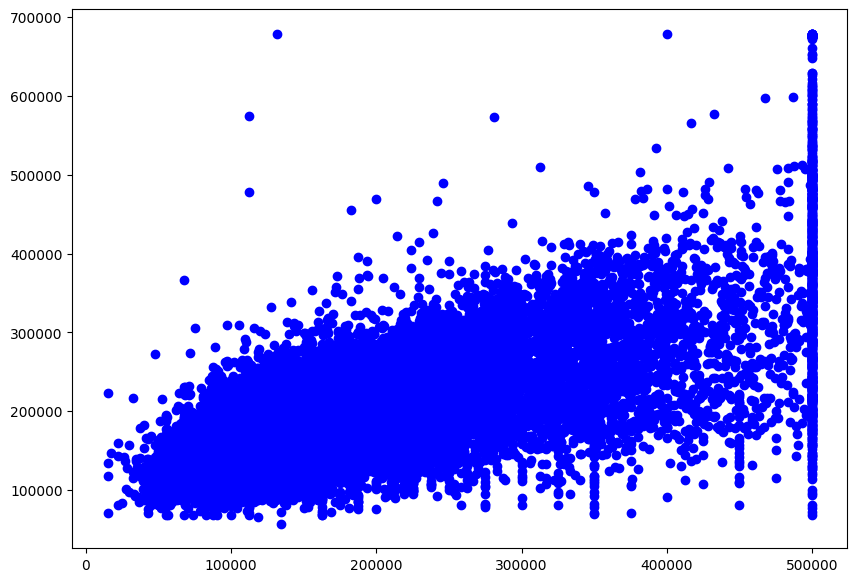

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Get the adult.csv from GitHub repo
# URL to the raw CSV file in the GitHub repo
file_path = "/content/sample_data/california_housing_train.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

## Lets assess how the data provided help explain median_house_value

# Display the first few rows of the DataFrame
df.head()

# df = pd.DataFrame(data)
df.replace('?', np.nan, inplace=True)

np.random.seed(42)  # For reproducibility


# Independent variables (predictors)
X = df[['population', 'median_income']]

# Dependent variable (response)
y = df['median_house_value']

# Step 1. Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 2. Display the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Step 3. Predict the response
y_pred = model.predict(X)

# Step 4: Calculate the residuals (errors)
residuals = y - y_pred
print("Residuals (errors):", residuals)


# Step 6: Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y - y_pred)**2)

# Step 7: Calculate Total Sum of Squares (TSS)
y_mean = np.mean(y)
TSS = np.sum((y - y_mean)**2)

# Step 8: Calculate R-squared (R^2)
R_squared = 1 - (RSS / TSS)

# Output the results
print("Coefficients (Intercept, beta_1, beta_2):", beta)
print("Predicted Y:", y_pred)
print("Actual Y:", y)
print("R-squared (R^2):", R_squared)

# Plot Actual vs Predicted Y
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot the actual data points
ax.scatter(y, y_pred,color='blue', label='Observed vs Predicted Response')


 ### **Now our code**

In [ ]:
# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X1 = np.column_stack((np.ones(len(X)), X))
y1 = y
# Display the design matrix
print("Design Matrix (X):")
print(X1)

# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y
# X^T X
X_transpose_X = np.dot(X1.T, X1)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X1.T, y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)

# Step 3: Use the coefficients to predict Y
y1_pred = np.dot(X1, beta)

print("Predicted Y:", y1_pred)
print("Actual Y:", y1)

# Step 4: Calculate the residuals (errors)
residuals = y1 - y1_pred
print("Residuals (errors):", residuals)

# Step 5: Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y1 - y1_pred)**2)

# Step 7: Calculate Total Sum of Squares (TSS)
y1_mean = np.mean(y1)
TSS = np.sum((y1 - y1_mean)**2)

# Step 8: Calculate R-squared (R^2)
R_squared = 1 - (RSS / TSS)

# Output the results
print("Coefficients (Intercept, beta_1, beta_2):", beta)
print("Predicted Y:", y1_pred)
print("Actual Y:", y1)
print("R-squared (R^2):", R_squared)

Design Matrix (X):
[[1.0000e+00 1.0150e+03 1.4936e+00]
 [1.0000e+00 1.1290e+03 1.8200e+00]
 [1.0000e+00 3.3300e+02 1.6509e+00]
 ...
 [1.0000e+00 1.2440e+03 3.0313e+00]
 [1.0000e+00 1.2980e+03 1.9797e+00]
 [1.0000e+00 8.0600e+02 3.0147e+00]]
Coefficients (Intercept, beta_1, beta_2): [ 4.79439716e+04 -2.76950907e+00  4.20530126e+04]
Predicted Y: [107943.2995309  121353.67880374 116447.04359923 ... 171973.99940287
 127601.49787975 172488.96436867]
Actual Y: 0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64
Residuals (errors): 0        -41043.299531
1        -41253.678804
2        -30747.043599
3       -107338.274737
4        -61667.847208
             ...      
16995    -33155.182877
16996    -71522.458196
16997    -68373.999403
16998    -41801.497880
16999    -77888.964369
Name: median_h

### **Looks like we get the exact same results...**

### **Visualizations**

KeyError: 'educational-num'

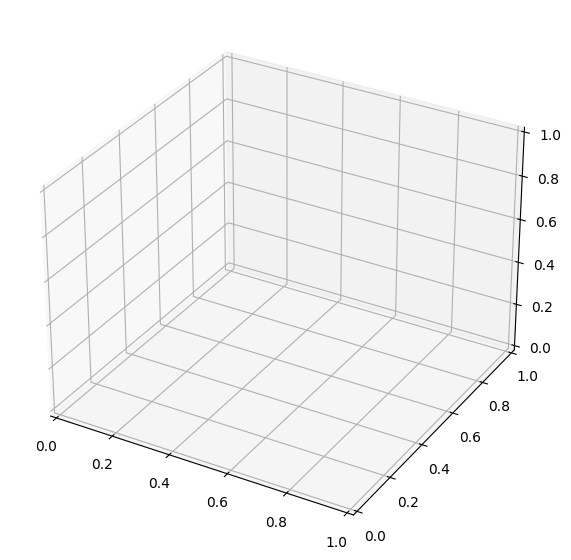

In [2]:

# Prepare the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(df['educational-num'], df['age'], df['numeric_income'], color='blue', label='Observed data')

# Plot the predicted plane from the regression model
# Create a meshgrid of the predictors for a smooth plane
education_grid, age_grid = np.meshgrid(np.linspace(df['educational-num'].min(), df['educational-num'].max(), 10),
                                              np.linspace(df['age'].min(), df['age'].max(), 10))

# Calculate the predicted income using the regression model
predicted_income_grid = model.intercept_ + model.coef_[0] * education_grid + model.coef_[1] * age_grid

# Plot the regression plane
ax.plot_surface(education_grid, age_grid, predicted_income_grid, color='orange', alpha=0.5, label='Regression plane')

# Add projections from the observed data to the regression plane
for i in range(len(df)):
    ax.plot([df['educational-num'][i], df['educational-num'][i]],
            [df['age'][i], df['age'][i]],
            [df['numeric_income'][i], y_pred[i]],
            color='red', linestyle='--', label='Projection' if i == 0 else "")  # Only add label for the first projection

# Labels
ax.set_xlabel('Education (years)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Income (thousands)')
ax.set_title('3D Visualization of Multiple Regression with Projections')

# Show the plot
plt.show()


#Correlation&MLR

### **Scenario:**
Let’s assume we have data on the height, weight, and age of a group of people, and we want to:



1.   Investigate if there is any correlation between these variables.
2.  Use multiple regression to predict a person’s weight based on their height and age.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a simple dataset
data = {
    'Height': [170, 165, 180, 175, 160, 155, 182, 178, 169, 172],  # in cm
    'Weight': [70, 65, 80, 75, 60, 55, 85, 78, 68, 72],  # in kg
    'Age': [25, 30, 35, 40, 22, 28, 33, 38, 26, 31]  # in years
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)


   Height  Weight  Age
0     170      70   25
1     165      65   30
2     180      80   35
3     175      75   40
4     160      60   22
5     155      55   28
6     182      85   33
7     178      78   38
8     169      68   26
9     172      72   31


### **Correlation Analysis**

#### **Pearson Correlation Coefficient**
The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1, where:

- 1 means perfect positive correlation,
- -1 means perfect negative correlation,
- 0 means no correlation.

Let's calculate the correlation between height, weight, and age.

          Height    Weight       Age
Height  1.000000  0.994941  0.684966
Weight  0.994941  1.000000  0.671348
Age     0.684966  0.671348  1.000000


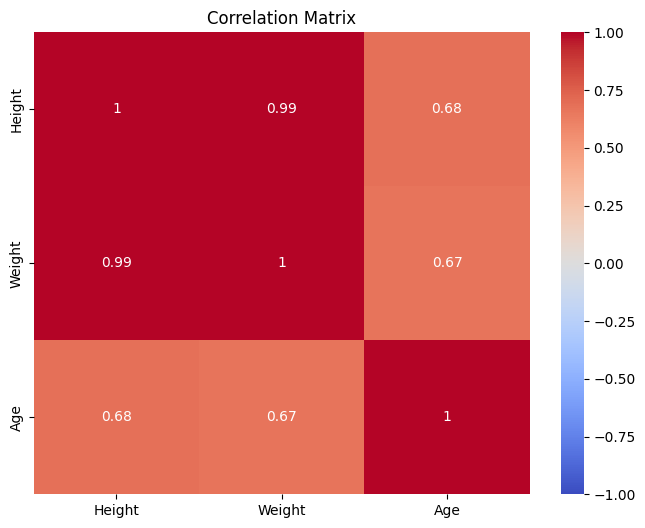

In [3]:
# Correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#### **Interpretation:**
- Height and Weight: Correlation = 0.99 (strong positive correlation).
- Age and Weight: Correlation = 0.67 (positive correlation).
- Age and Height: Correlation = 0.68 (positive correlation).

From this, we see that height and weight are highly correlated, meaning that as a person’s height increases, their weight tends to increase.

Now lets do multiple regression with this data...


In [4]:
# Independent variables (Height and Age)
X = df[['Height', 'Age']]

# Dependent variable (Weight)
y = df['Weight']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: -110.14909975029569
Coefficients: [ 1.06616434 -0.03047196]


So the regression equation will be

$$
\hat{y} = -110 + 1.07 \cdot \text{Height} - 0.03  \cdot \text{Age}
$$

Let’s predict the weight of a person who is 175 cm tall and 30 years old:

In [5]:
# Predict for a new person with height = 175 cm and age = 30 years
new_person = [[175, 30]]
predicted_weight = model.predict(new_person)
print(f"Predicted Weight: {predicted_weight[0]:.2f} kg")


Predicted Weight: 75.52 kg


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can evaluate how well the regression model fits the data using the R-squared value:

In [6]:
# Predict values for the training set
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.2f}")


R-squared: 0.99


### **Visualization**

A residual plot helps us visualize the difference between actual and predicted values.



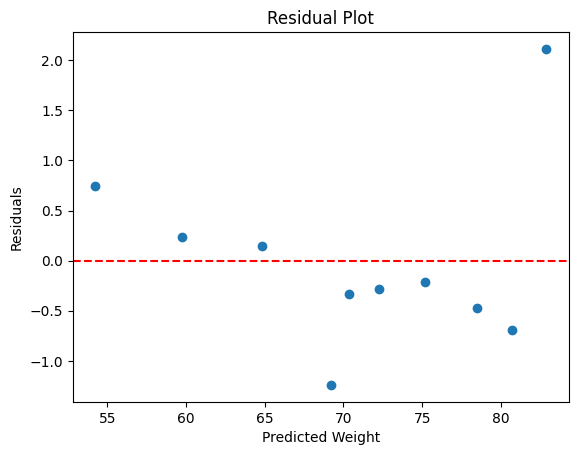

In [7]:
# Plot residuals
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### **3D Scatter Plot with Regression Plane:**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


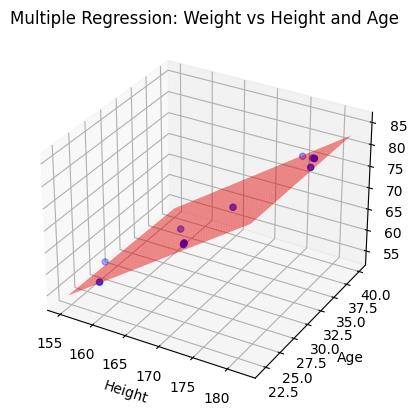

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['Height'], df['Age'], df['Weight'], color='blue', label='Data Points')

# Generate prediction plane
x_surf, y_surf = np.meshgrid(np.linspace(df['Height'].min(), df['Height'].max(), 100),
                             np.linspace(df['Age'].min(), df['Age'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Weight')
ax.set_title('Multiple Regression: Weight vs Height and Age')

plt.show()


In [9]:
# with plotly
!pip install plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotly.figure_factory as ff

# Prepare the data for fitting
# Independent variables (Height and Age)
X = df[["Height", "Age"]]

# Dependent variable (Weight)
y = df["Weight"]

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

x1=df["Height"]
x2=df["Age"]


# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)


# Prepare the data for fitting
X = np.column_stack((x1, x2))

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

# Layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    ),
    title='Interactive Multiple Linear Regression',
)

# Create the figure
fig = go.Figure(data=[scatter, plane], layout=layout)

# Show the plot
fig.show()

Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]
Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]


In [10]:
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

# Prepare the data for fitting
X = df[["Height", "Age"]]
y = df["Weight"]

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

# Residuals (errors between actual and predicted)
residuals = y - y_pred

x1 = df["Height"]
x2 = df["Age"]

# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

# Manually add error bars as lines (from y to y_pred)
error_lines = []
for i in range(len(x1)):
    error_lines.append(go.Scatter3d(
        x=[x1.iloc[i], x1.iloc[i]],  # Keep x (Height) the same
        y=[x2.iloc[i], x2.iloc[i]],  # Keep y (Age) the same
        z=[y.iloc[i], y_pred[i]],    # z goes from actual y to predicted y_pred
        mode='lines',
        line=dict(color='red', width=2),
        name='Error Bar' if i == 0 else None,  # Only label the first line as "Error Bar"
        showlegend=(i == 0)  # Show legend only for the first error line
    ))

# Layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='Height',
        yaxis_title='Age',
        zaxis_title='Weight'
    ),
    title='Interactive Multiple Linear Regression with Manual Error Bars',
)

# Create the figure with both data points, regression plane, and error lines
fig = go.Figure(data=[scatter, plane] + error_lines, layout=layout)

# Show the plot
fig.show()


Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]


#PairsPlot_Correlogram

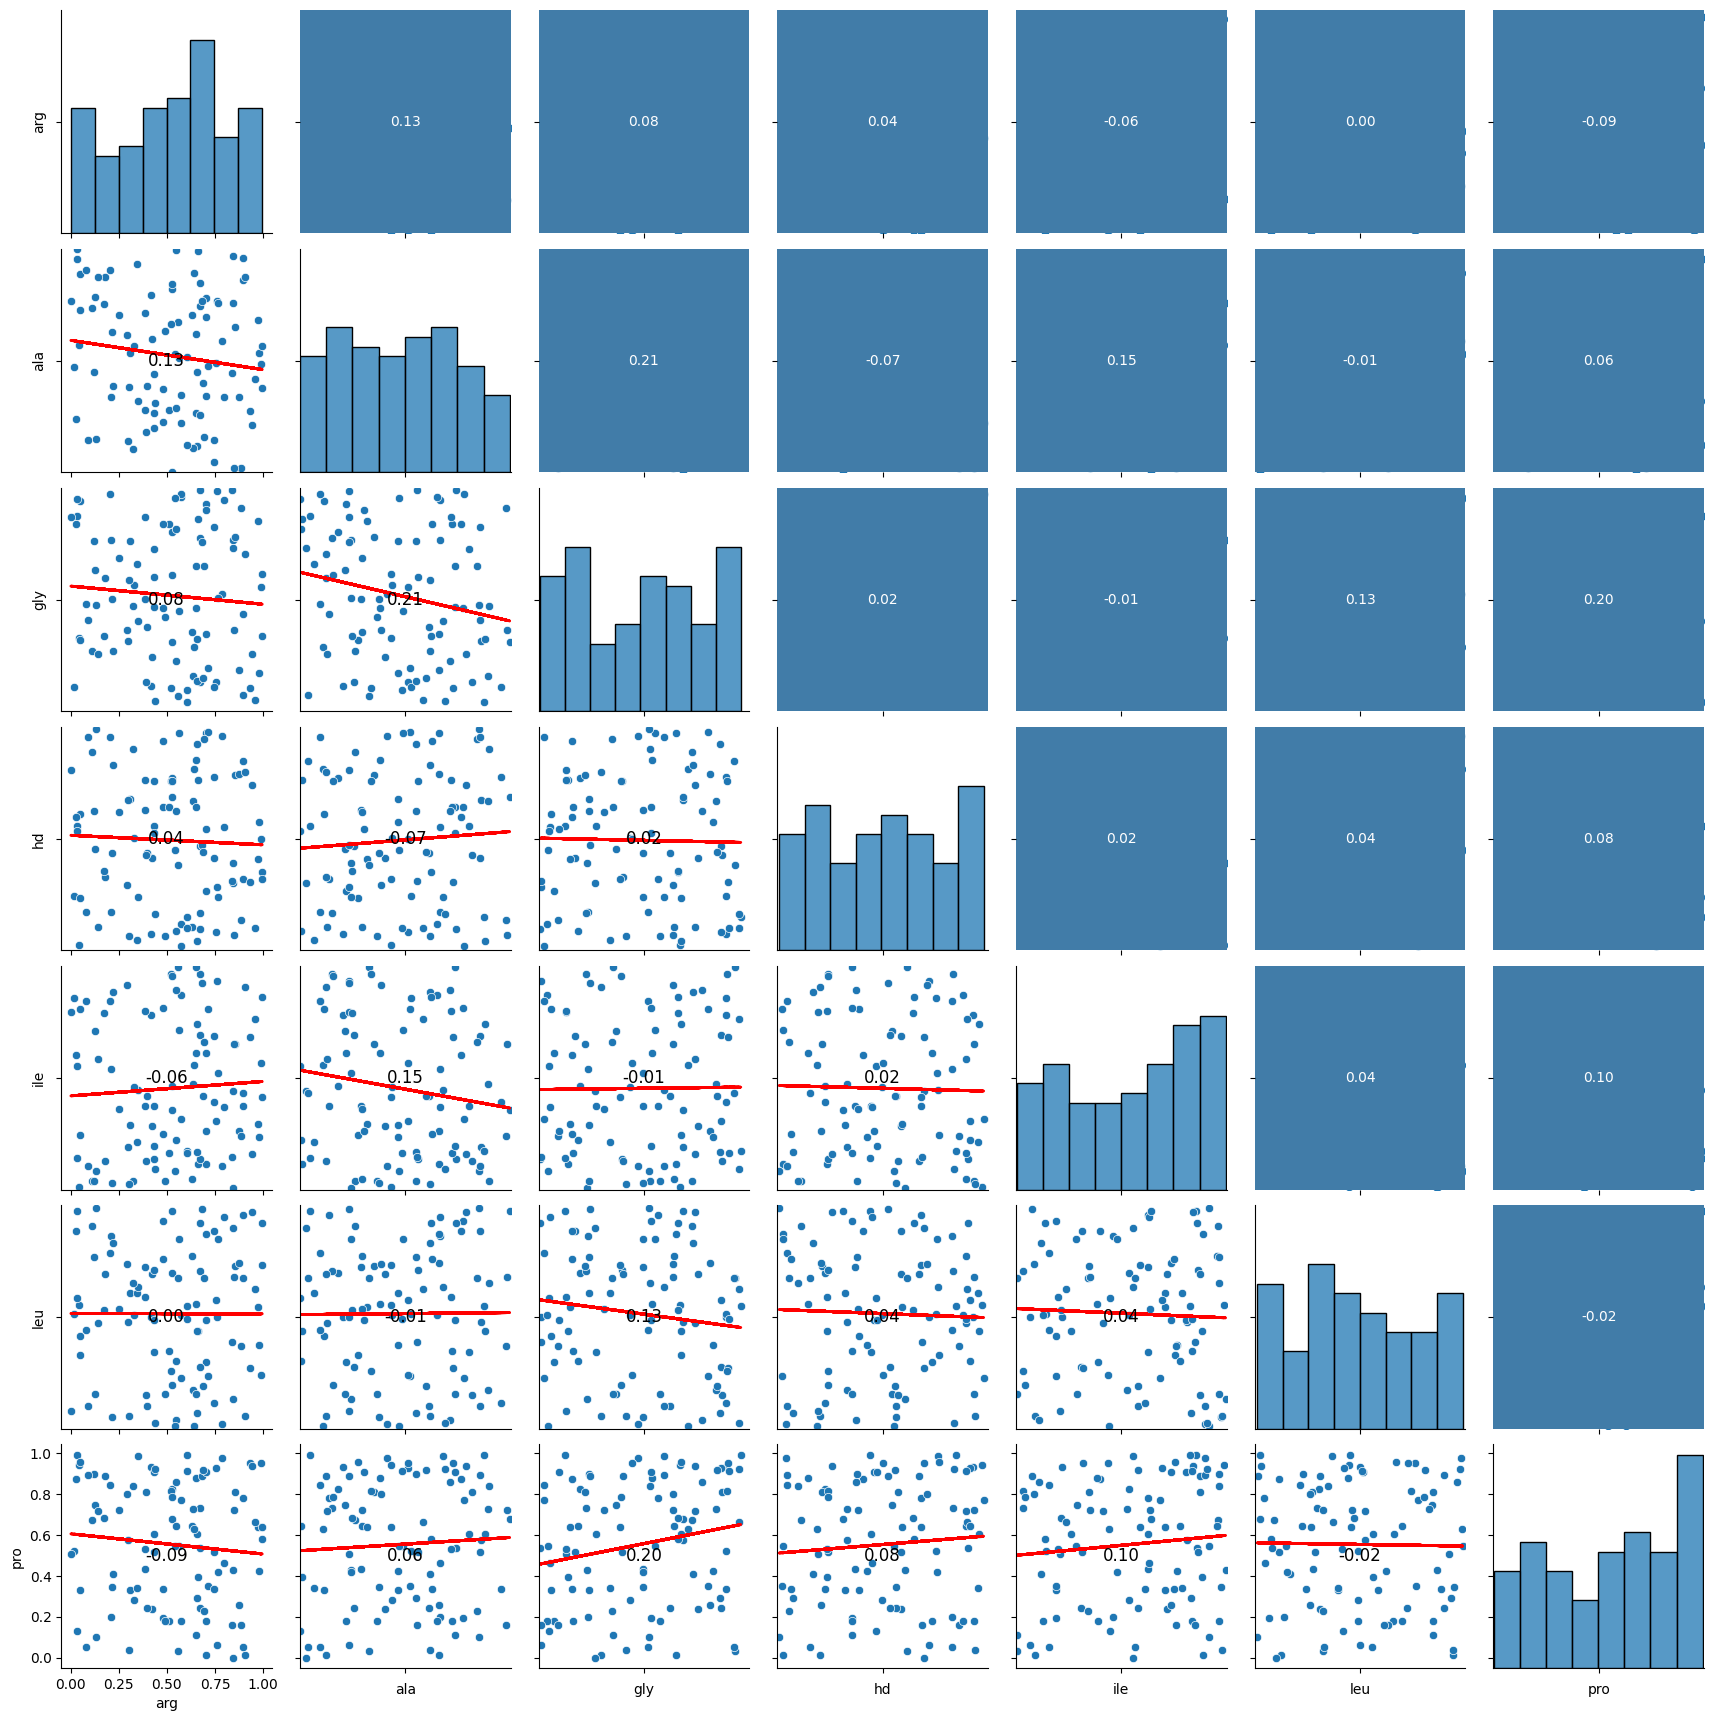

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm


# Function to calculate the correlation and annotate the matrix
def correlation_with_stars(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center', fontsize=12)
    ax.annotate(f"{'***' if abs(r) > 0.7 else ''}", xy=(0.5, 0.7), xycoords='axes fraction',
                ha='center', va='center', fontsize=10, color='red')

# Function to plot OLS regression line on the scatterplots
def plot_ols(x, y, **kws):
    ax = plt.gca()
    # Add constant for the intercept in OLS
    x_ = sm.add_constant(x)
    model = sm.OLS(y, x_).fit()
    # Predict values
    pred = model.predict(x_)
    # Plot the regression line
    ax.plot(x, pred, color='red', linewidth=2)

# Function to fill the upper diagonal with heatmap colors based on correlation
def heatmap_upper(x, y, **kws):
    ax = plt.gca()
    r, _ = pearsonr(x, y)
    cmap = sns.diverging_palette(240, 10, as_cmap=True)  # Adjust palette as needed
    sns.heatmap([[r]], annot=True, fmt=".2f", cmap=cmap, cbar=False, ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])


# Load your data here (replace this with your actual data loading code)
# Example with random data
df = pd.DataFrame(np.random.rand(100, 7), columns=['arg', 'ala', 'gly', 'hd', 'ile', 'leu', 'pro'])

# Create a pairplot with OLS regression line and correlation annotations
g = sns.pairplot(df)

# Add correlation annotations and OLS regression line
g.map_lower(correlation_with_stars)
g.map_lower(plot_ols)

# Add heatmap for correlation in the upper triangle
g.map_upper(heatmap_upper)

# Show the plot
plt.show()

